<a href="https://colab.research.google.com/github/Jpsama1236/DataAnalytics/blob/main/Project_Forest_Fires_in_Brazil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/amazon.csv',encoding="iso-8859-1",parse_dates=['date'])

In [3]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

### 1. Display Top 5 Rows of The Dataset

In [4]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


### 2. Check Last 5 Rows of The Dataset

In [5]:
data.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


### 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [6]:
data.shape

(6454, 5)

In [ ]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 6454
Number of Columns 5


### 4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


### 5. Check For Duplicate Data and Drop Them

In [8]:
dup_data = data.duplicated().any()

In [9]:
print("Are there any duplicated values in the data",dup_data)

Are there any duplicated values in the data True


In [10]:
data = data.drop_duplicates()

In [11]:
data.shape

(6422, 5)

In [12]:
6454-6422

32

### 6.Check Null Values In The Dataset

In [13]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

### 7. Get Overall Statistics About The Dataframe

In [14]:
data.describe(include='all',datetime_is_numeric=True)

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Agosto,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


### 8. Rename Month Names To English

In [15]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [16]:
data['month_new']=data['month'].map({'Janeiro':'jan',
                                    'Fevereiro':'feb',
                                    'Março':'march',
                                    'Abril':'april',
                                    'Maio':'may',
                                    'Junho':'jun',
                                    'Julho':'july',
                                    'Agosto':'august',
                                    'Setembro':'sep',
                                    'Outubro':'oct',
                                    'Novembro':'nov',
                                    'Dezembro':'dec'
                                   })

In [17]:
data.head()

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,jan
1,1999,Acre,Janeiro,0.0,1999-01-01,jan
2,2000,Acre,Janeiro,0.0,2000-01-01,jan
3,2001,Acre,Janeiro,0.0,2001-01-01,jan
4,2002,Acre,Janeiro,0.0,2002-01-01,jan


### 9.Total Number of Fires Registered

In [18]:
data.shape

(6422, 6)

### 10. In Which Month Maximum Number of Forest Fires Were Reported?

In [19]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [20]:
data1= data.groupby('month_new')['number'].sum().reset_index()
data1

,month_new,number
0,april,28184.770
1,august,88050.435
2,dec,57535.480
3,feb,30839.050
4,jan,47681.844
5,july,92319.113
6,jun,55997.675
7,march,30709.405
8,may,34725.363
9,nov,85508.054


<Axes: xlabel='month_new', ylabel='number'>

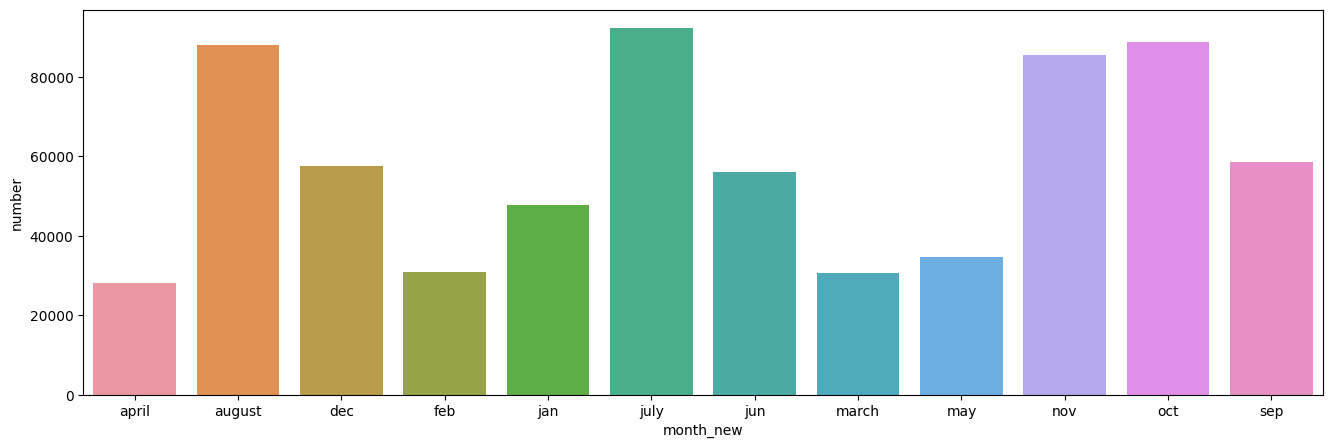

In [21]:
plt.figure(figsize=(16,5))
sns.barplot(x="month_new",y="number",data=data1)

### 11. In Which Year Maximum Number of Forest Fires Were Reported?

In [22]:
data2= data.groupby('year')['number'].sum().reset_index()
data2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<Axes: xlabel='year', ylabel='number'>

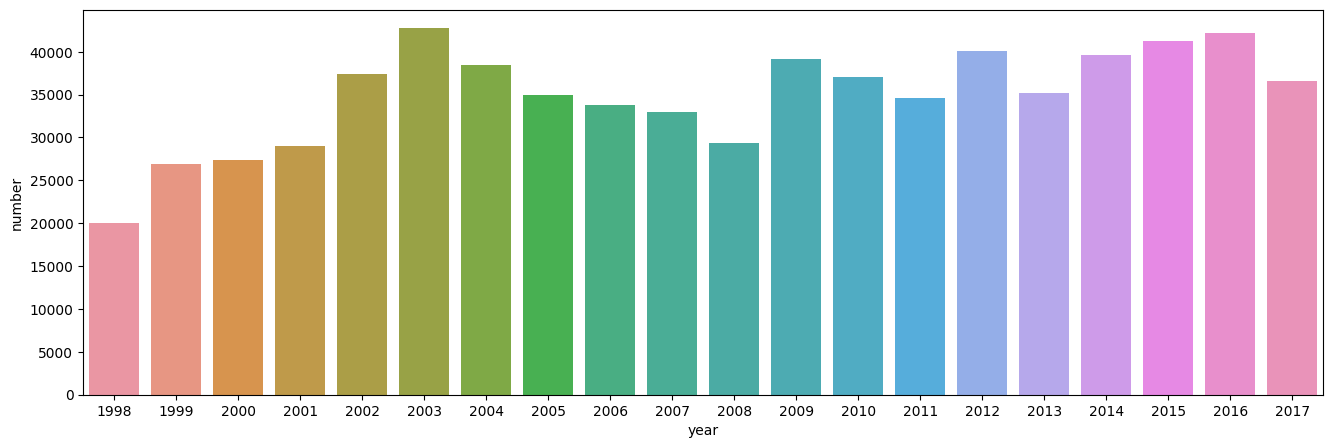

In [23]:
plt.figure(figsize=(16,5))
sns.barplot(x="year",y="number",data=data2)

### 12. In Which State Maximum Number of Forest Fires Were Reported?

In [ ]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [24]:
data3= data.groupby('state')['number'].sum().reset_index()
data3

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


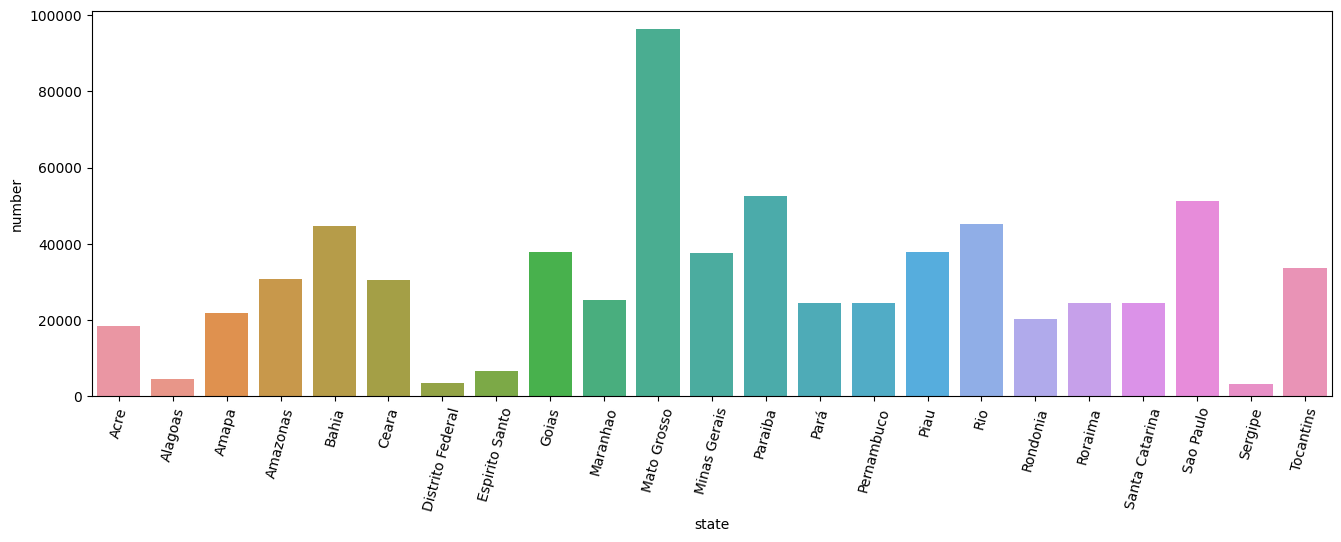

In [25]:
plt.figure(figsize=(16,5))
sns.barplot(x="state",y="number",data=data3)
plt.xticks(rotation=75)
plt.show()

### 13. Find Total Number of Fires Were Reported In Amazonas

In [27]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [28]:
data[data['state']=="Amazonas"]['number'].sum()

30650.129

### 14. Display Number of Fires Were Reported In Amazonas (Year-Wise)

In [ ]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [29]:
data4 = data[data['state']=="Amazonas"]
data5= data4.groupby('year')['number'].sum().reset_index()
data5

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


<Axes: xlabel='year', ylabel='number'>

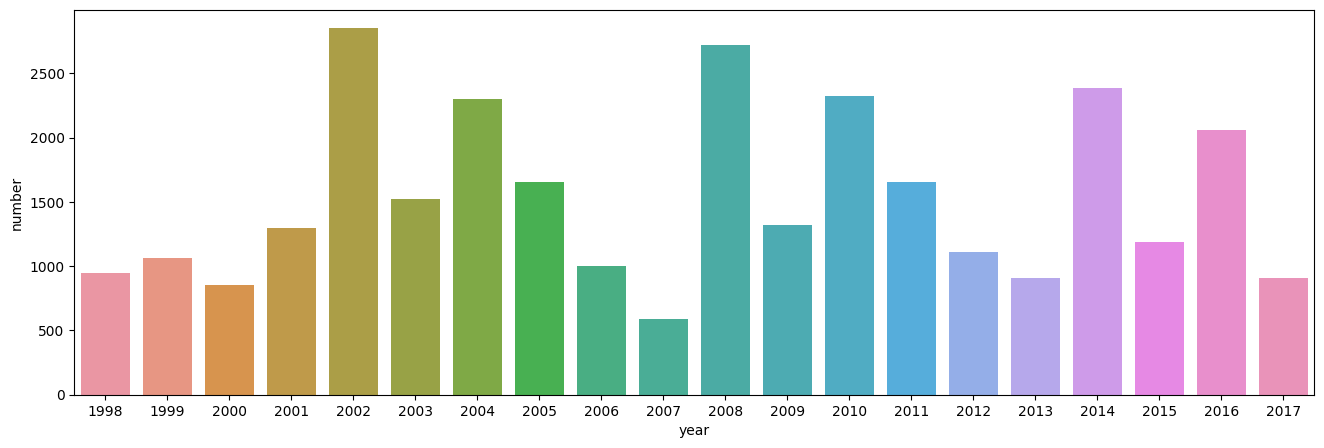

In [30]:
plt.figure(figsize=(16,5))
sns.barplot(x="year",y="number",data=data5)

### 15. Display Number of Fires Were Reported In Amazonas (Day-Wise)

In [31]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [45]:
data6 = data[data['state']=="Amazonas"]

In [47]:
data6['weekday']=data6['date'].dt.dayofweek

<ipython-input-47-56b8947c3d3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data6['weekday']=data6['date'].dt.dayofweek


In [48]:
data6['weekday']=data6['weekday'].map({0:'monday',1:'tuesday',2:'wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})

<ipython-input-48-523b761acc60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data6['weekday']=data6['weekday'].map({0:'monday',1:'tuesday',2:'wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})


In [49]:
data6.groupby(['weekday'])['number'].sum().reset_index()

,weekday,number
0,Friday,5446.480
1,Saturday,4162.666
2,Sunday,3015.186
3,Thursday,5754.802
4,monday,1886.601
5,tuesday,6474.217
6,wednesday,3910.177


In [43]:
day=data6.groupby(data6['date'].dt.dayofweek).sum().number

import calendar

day.index = [calendar.day_name[x] for x in range(0,7)]
day= day.reset_index()

<ipython-input-43-2945ff4784c4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  day=data6.groupby(data6['date'].dt.dayofweek).sum().number


In [44]:
day

,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


<AxesSubplot:xlabel='index', ylabel='number'>

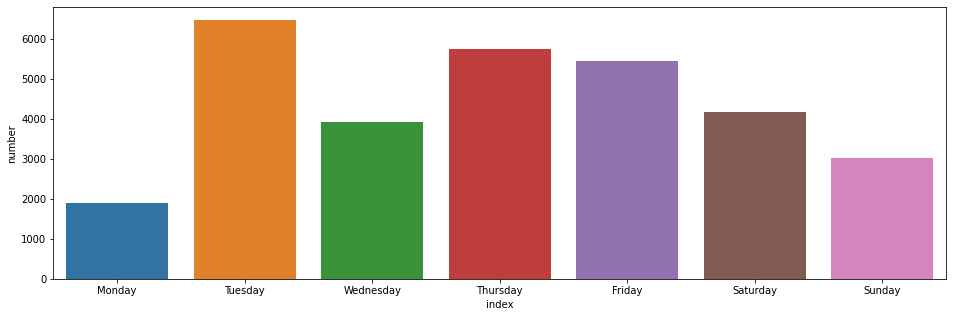

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x="index",y="number",data=day)

### 16. Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’

In [ ]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [ ]:
fire = data[data['year']==2015].groupby('month_new')['number'].sum().reset_index()

In [ ]:
fire

,month_new,number
0,april,2573.000
1,august,4363.125
2,dec,4088.522
3,feb,2309.000
4,jan,4635.000
5,july,4364.392
6,jun,3260.552
7,march,2202.000
8,may,2384.000
9,nov,4034.518


<AxesSubplot:xlabel='month_new', ylabel='number'>

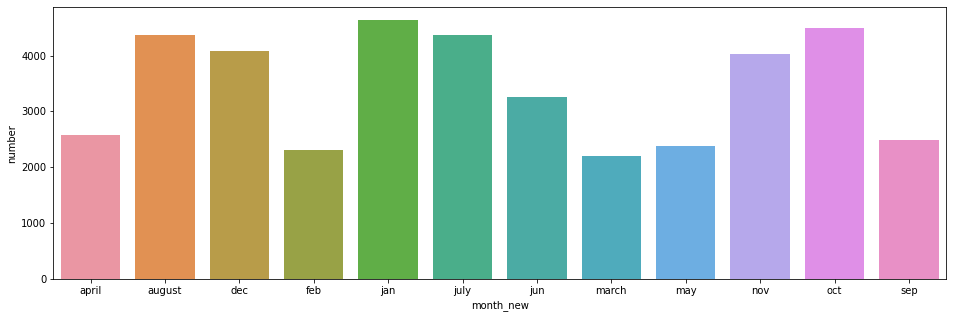

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x="month_new",y="number",data=fire)

### 17. Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)

In [ ]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [ ]:
data8= data.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()

In [ ]:
data8

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


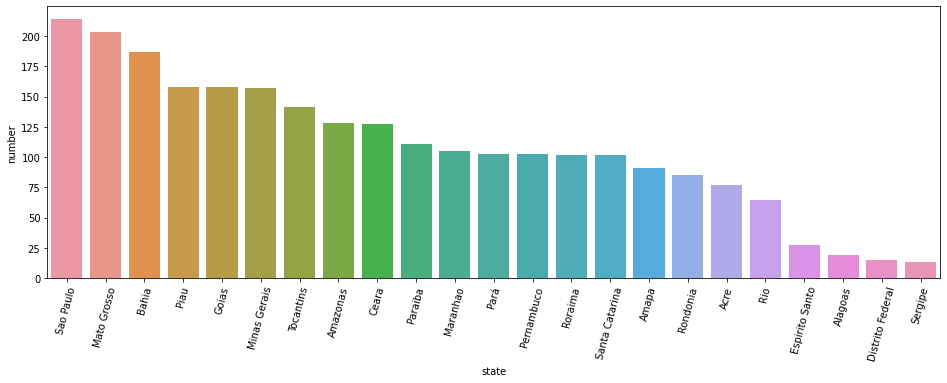

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x="state",y="number",data=data8)
plt.xticks(rotation=75)
plt.show()

### 18.  To Find The State Names Where Fires Were Reported In 'dec' Month

In [ ]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [ ]:
data[data['month_new']=="dec"]['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)